**Step 1a: Loading and Understanding the Dataset**

We start by loading both the training and test datasets to understand their structure. This helps us perform exploratory data analysis (EDA) to identify patterns, detect issues, and prepare for further processing. Let's explore the data to gain valuable insights!

In [25]:
import pandas as pd
# Load the datasets
train_file = 'train_data.xlsx'
test_file = 'test_data.xlsx'

train_data = pd.read_excel(train_file)
test_data = pd.read_excel(test_file)

train_data['dataset_type'] = 'train'
test_data['dataset_type'] = 'test'

# Combine the datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)
display(combined_data.head())

,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status,dataset_type
0,10608026,2014-01-01,C5,36 months,MORTGAGE,665,9,70000.0,16.24,debt_consolidation,7200,Individual,253.99,Verified,4648,11,0,train
1,10235120,2014-01-01,E5,36 months,MORTGAGE,660,8,65000.0,23.40,home_improvement,6000,Individual,233.52,Source Verified,14051,11,1,train
2,10705805,2014-01-01,D2,36 months,MORTGAGE,660,7,73000.0,17.57,other,8000,Individual,287.50,Verified,14885,11,0,train
3,11044991,2014-01-01,B4,36 months,MORTGAGE,690,5,118000.0,12.85,debt_consolidation,10000,Individual,336.22,Source Verified,7542,2,1,train
4,10161054,2014-01-01,C3,60 months,MORTGAGE,665,5,63000.0,14.98,debt_consolidation,10000,Individual,237.80,Verified,6318,11,0,train


**Step 1b: Column Descriptions**

In [26]:
column_descriptions = {
    'customer_id': 'Unique identification for each customer application',
    'transaction_date': 'Transaction data',
    'sub_grade': 'Customer classification based on geography, income, and age',
    'term': 'Total loan tenure',
    'home_ownership': 'Status of home ownership of applicant',
    'cibil_score': 'CIBIL score of applicants',
    'total_no_of_acc': 'Total number of bank accounts held by applicant',
    'annual_inc': 'Annual income of the applicant',
    'int_rate': 'Interest rate charged by NBFC',
    'purpose': 'Purpose for taking loan, defined by applicant',
    'loan_amnt': 'Total loan amount',
    'application_type': 'Applicant type',
    'installment': 'Installment amount',
    'verification_status': 'Applicant verification status',
    'account_bal': 'Total account balance as per previous month',
    'emp_length': 'Total years of employment experience',
    'loan_status': 'Loan status (1: default, 0: non-default)',
    'dataset_type': 'Source of the data row (train/test)'
}

print("Column Descriptions:")
for col, desc in column_descriptions.items():
    print(f"{col}: {desc}")

Column Descriptions:
customer_id: Unique identification for each customer application
transaction_date: Transaction data
sub_grade: Customer classification based on geography, income, and age
term: Total loan tenure
home_ownership: Status of home ownership of applicant
cibil_score: CIBIL score of applicants
total_no_of_acc: Total number of bank accounts held by applicant
annual_inc: Annual income of the applicant
int_rate: Interest rate charged by NBFC
purpose: Purpose for taking loan, defined by applicant
loan_amnt: Total loan amount
application_type: Applicant type
installment: Installment amount
verification_status: Applicant verification status
account_bal: Total account balance as per previous month
emp_length: Total years of employment experience
loan_status: Loan status (1: default, 0: non-default)
dataset_type: Source of the data row (train/test)


**Step 1c: Basic Statistics**

In [27]:
print("Basic Statistics for Numerical Features:")
combined_data.describe()

Basic Statistics for Numerical Features:


,customer_id,transaction_date,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,account_bal,emp_length,loan_status
count,1.221600e+05,122160,122160.000000,122160.000000,1.221600e+05,122160.000000,122160.000000,122160.000000,122160.000000,122160.000000,122160.000000
mean,4.602978e+07,2015-04-03 02:10:20.275049216,684.529920,0.274427,7.146152e+04,16.040654,15184.456655,456.585436,15795.845711,5.948944,0.731958
min,3.476740e+05,2014-01-01 00:00:00,660.000000,0.000000,0.000000e+00,12.050000,1000.000000,33.240000,0.000000,0.000000,0.000000
25%,2.751232e+07,2014-10-01 00:00:00,665.000000,0.000000,4.300000e+04,13.350000,8000.000000,266.060000,5625.000000,2.000000,0.000000
50%,4.759330e+07,2015-05-01 00:00:00,680.000000,0.000000,6.000000e+04,14.990000,13375.000000,389.690000,10786.500000,6.000000,1.000000
75%,6.407944e+07,2015-11-01 00:00:00,695.000000,0.000000,8.500000e+04,17.860000,20400.000000,602.790000,19609.250000,11.000000,1.000000
max,8.436346e+07,2016-06-01 00:00:00,845.000000,10.000000,8.900060e+06,30.990000,40000.000000,1534.880000,875598.000000,11.000000,1.000000
std,2.142298e+07,NaN,22.989021,0.648259,5.993771e+04,3.307669,9119.420946,270.872966,20615.219480,4.231240,0.442941


**Step 1d: Missing Value Analysis**

In [4]:
# Check for missing values
missing_values = combined_data.isnull().sum()

# Display missing value statistics
print("Missing Values by Column:")
print(missing_values)

Missing Values by Column:
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dataset_type           0
dtype: int64


**Step 2a: Categorical Features vs. Target (loan_status)**


1) This code visualizes the distribution of loan status (default vs. non-default) across different sub-grades using a bar plot. It helps to identify patterns in loan status relative to the sub-grade categories.

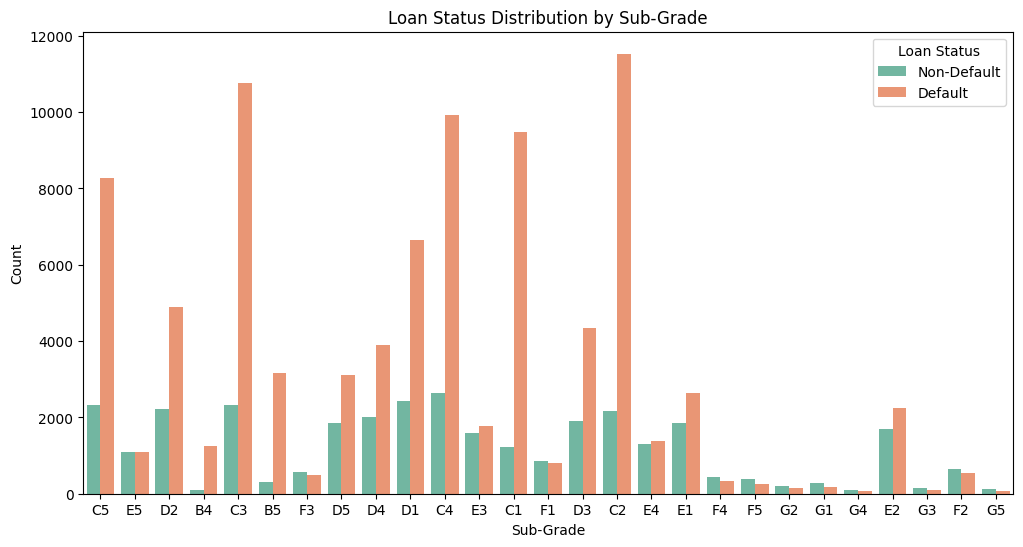

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for default rates segmented by categories (e.g., sub_grade)
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_data, x='sub_grade', hue='loan_status', palette='Set2')
plt.title('Loan Status Distribution by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Non-Default', 'Default'])
plt.show()

It reveals that higher sub-grades (e.g., C1, E1, D1) tend to have more loans, with a higher count of defaults in certain sub-grades like C1 and E1 compared to others.

2) This code visualizes the distribution of loan status (default vs. non-default) across different home ownership categories.

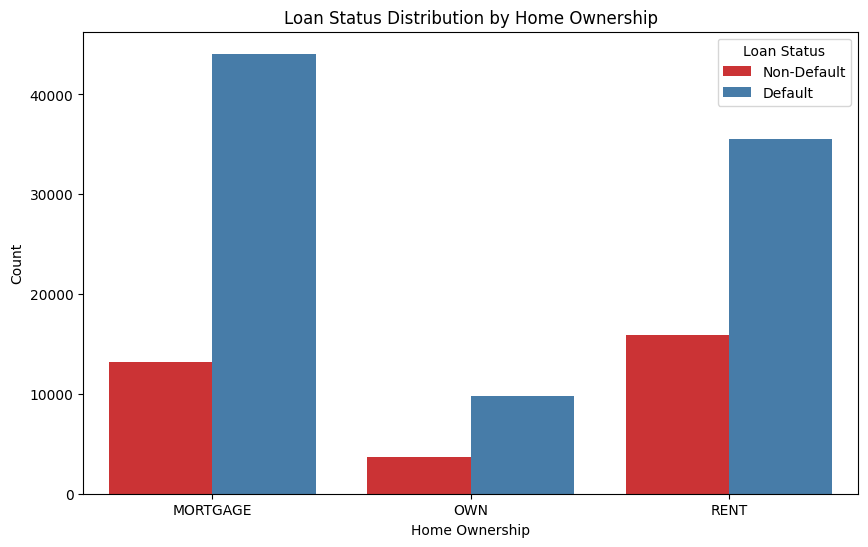

In [6]:
# Bar plot for home_ownership vs loan_status
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='home_ownership', hue='loan_status', palette='Set1')
plt.title('Loan Status Distribution by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Non-Default', 'Default'])
plt.show()

3) This code creates a pivot table to calculate the average default rate across different sub-grades and home ownership categories. The heatmap visualizes these rates, providing a deeper understanding of default patterns in relation to sub-grade and home ownership.

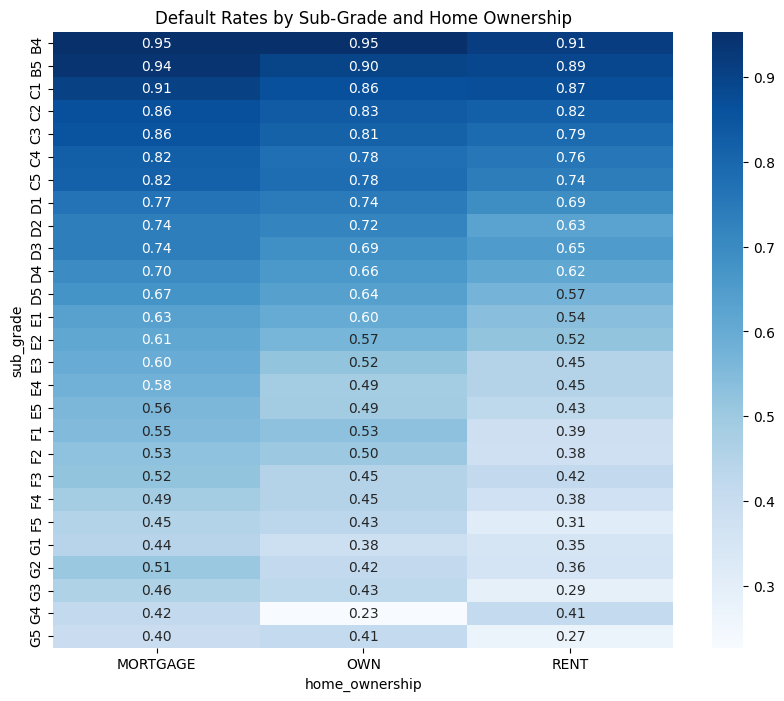

In [7]:
# Create a heatmap for deeper segmentation (pivot table)
pivot_table = combined_data.pivot_table(values='loan_status', index='sub_grade', columns='home_ownership', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='Blues')
plt.title('Default Rates by Sub-Grade and Home Ownership')
plt.show()

This heatmap visualizes default rates based on loan sub-grades and home ownership types (MORTGAGE, OWN, RENT). Higher default rates are concentrated in lower sub-grades (e.g., G5-G1), while home ownership type also influences the risk, with RENT generally showing higher defaults.

**Step 2b: Numerical Features vs. Target**

1) This code creates a scatter plot to visualize the relationship between CIBIL score and loan amount, with points colored by loan status (default vs. non-default).

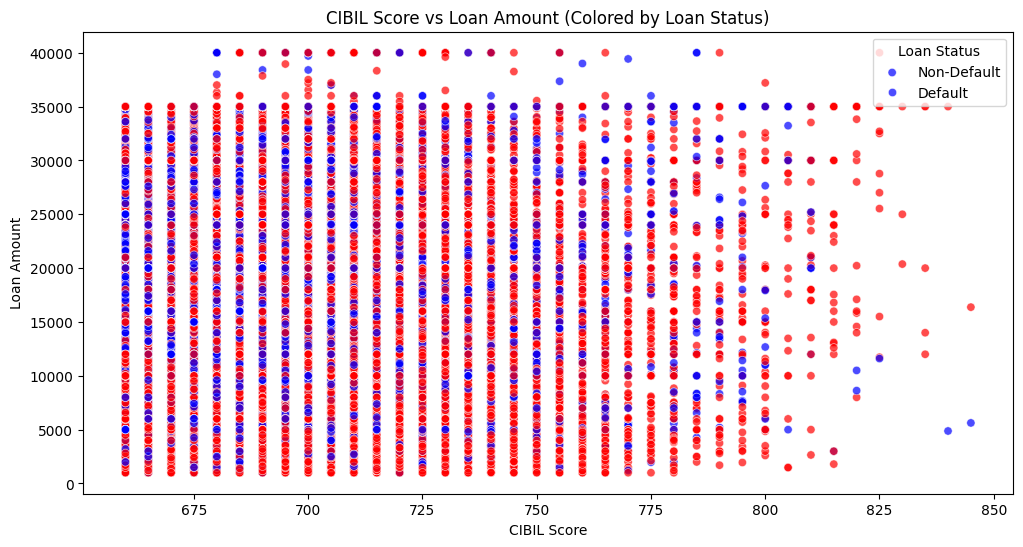

In [9]:
# Scatter plot for cibil_score vs loan_amnt colored by loan_status
plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined_data, x='cibil_score', y='loan_amnt', hue='loan_status', palette={0: 'blue', 1: 'red'}, alpha=0.7)
plt.title('CIBIL Score vs Loan Amount (Colored by Loan Status)')
plt.xlabel('CIBIL Score')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', labels=['Non-Default', 'Default'])
plt.show()

This scatter plot shows the relationship between CIBIL score and loan amount, with loan status (Default or Non-Default) indicated by color, highlighting higher defaults at lower CIBIL scores.

2) This code creates a histogram to visualize the distribution of CIBIL scores, split by loan status (e.g., Default and Non-Default). It uses different colors for each loan status to highlight differences in score distributions and overlays a KDE (Kernel Density Estimate) curve for better understanding of the density trends. This helps identify patterns, such as whether lower CIBIL scores are more associated with defaults.

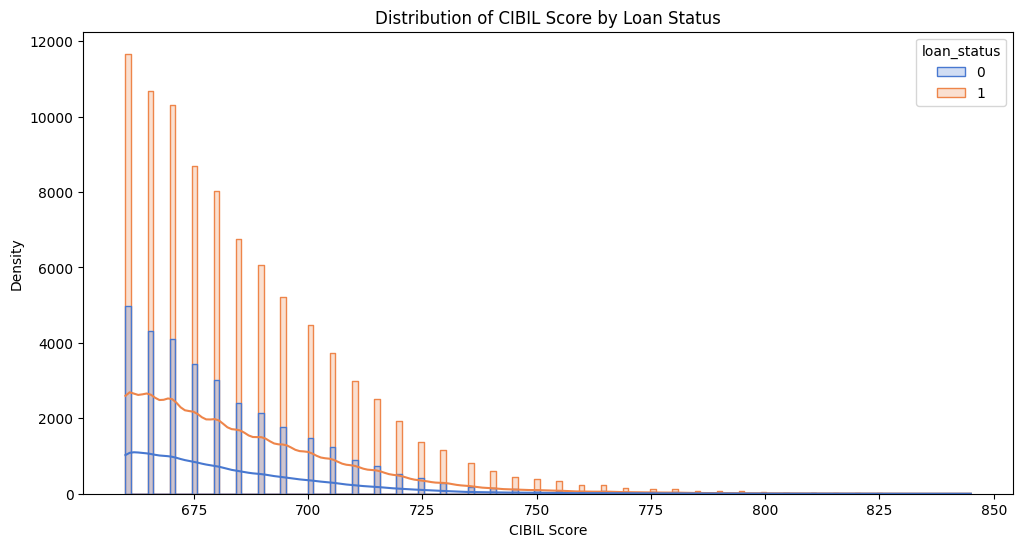

In [11]:
# Histogram of cibil_score split by loan_status
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_data, x='cibil_score', hue='loan_status', kde=True, element='step', palette='muted')
plt.title('Distribution of CIBIL Score by Loan Status')
plt.xlabel('CIBIL Score')
plt.ylabel('Density')
plt.show()

**Step 2c: Time-Based Analysis**

This code performs a time-based analysis by calculating the default rates for each year-month using transaction dates. It then plots these default rates over time as a line chart to identify trends or patterns in loan defaults.

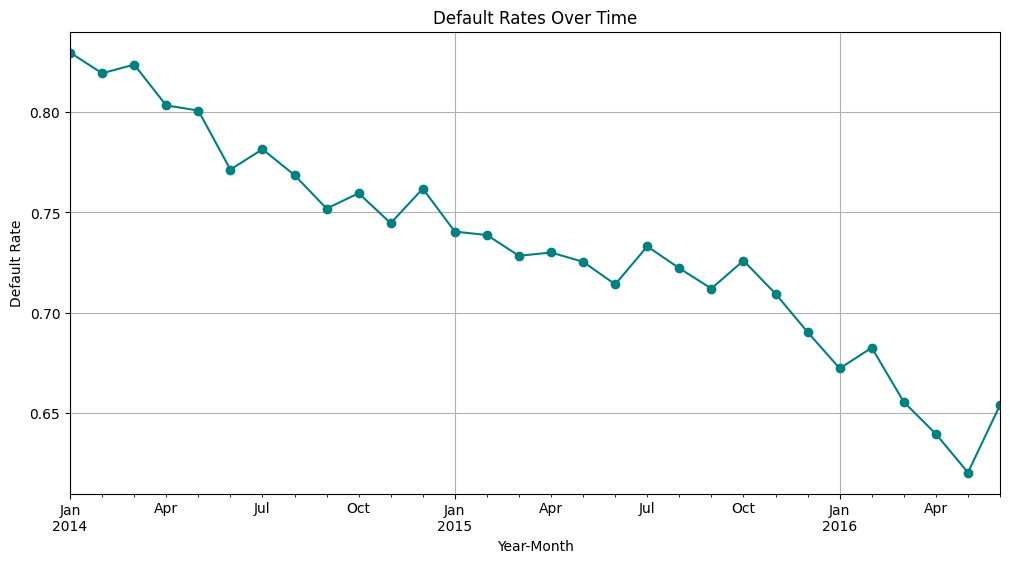

In [12]:
# Convert transaction_date to datetime if not already
combined_data['transaction_date'] = pd.to_datetime(combined_data['transaction_date'])

# Extract year-month for aggregation
combined_data['year_month'] = combined_data['transaction_date'].dt.to_period('M')

# Line plot of default rates over time
default_rates = combined_data.groupby('year_month')['loan_status'].mean()

plt.figure(figsize=(12, 6))
default_rates.plot(kind='line', marker='o', color='teal')
plt.title('Default Rates Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Default Rate')
plt.grid()
plt.show()


This line plot shows the trend of default rates over time, with a noticeable decline from early 2014 to mid-2016. It suggests that default rates have generally decreased, possibly due to improved financial conditions or better lending practices.

**Step 2e: Correlation Analysis**

This code performs a correlation analysis to identify numerical features strongly associated with loan status and detect multicollinearity among features. A heatmap visualizes these relationships, aiding in feature selection and understanding potential impacts on model performance.

Top Correlations with Loan Status:
loan_status        1.000000
cibil_score        0.054978
annual_inc         0.031963
emp_length         0.028566
account_bal        0.017266
total_no_of_acc   -0.008757
installment       -0.062182
loan_amnt         -0.104313
customer_id       -0.105431
int_rate          -0.280202
Name: loan_status, dtype: float64


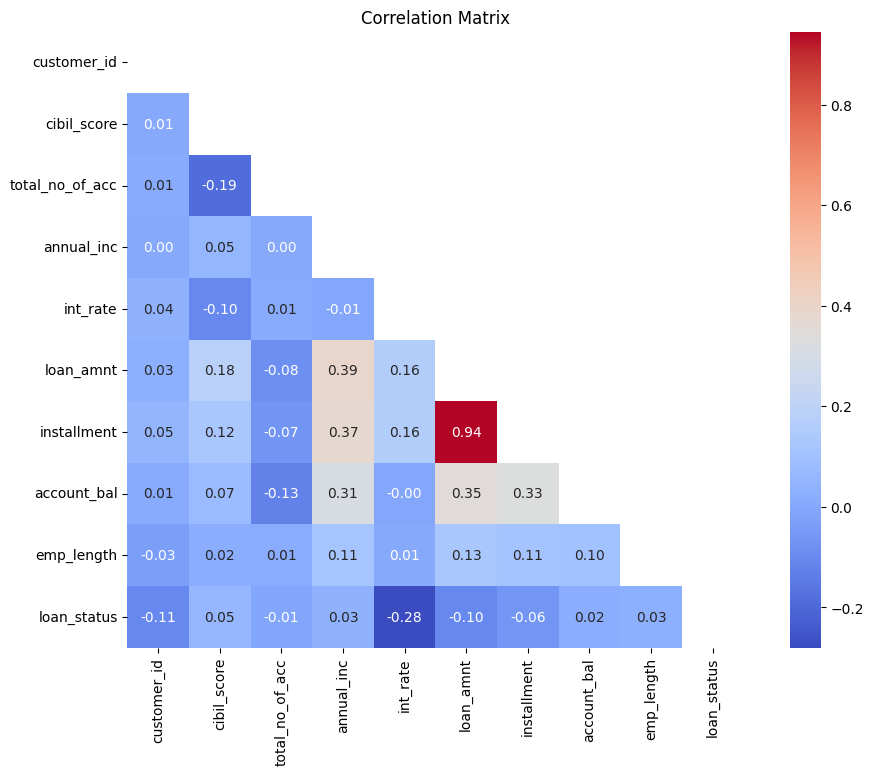

In [29]:
import numpy as np
correlation_matrix = combined_data.select_dtypes(include=['number']).corr()
# Filter for correlations with loan_status
target_corr = correlation_matrix['loan_status'].sort_values(ascending=False)

# Display top correlations with loan_status
print("Top Correlations with Loan Status:")
print(target_corr.head(10))

# Heatmap for visualizing correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(correlation_matrix), square=True)
plt.title("Correlation Matrix")
plt.show()

The correlation matrix identifies key predictors for loan default, such as cibil_score and loan_amnt, which show notable correlations with loan_status. High multicollinearity is observed between loan_amnt and installment (0.94), suggesting the need to exclude or combine these features to avoid redundancy. These insights help prioritize feature selection and improve the classification model's efficiency.

**Step 2f: Feature Importance Using Decision Tree**

This code uses a Decision Tree classifier to evaluate the importance of features in predicting loan default (loan_status). Categorical features are encoded using LabelEncoder, and the dataset is split into training and testing sets. The trained model computes feature importance, helping identify the most influential features like cibil_score or loan_amnt. Features with low importance can be dropped to enhance model efficiency and focus on significant predictors.

Feature Importance from Decision Tree:
                Feature  Importance
12          account_bal    0.186062
5            annual_inc    0.143110
10          installment    0.117357
6              int_rate    0.091191
3           cibil_score    0.081474
8             loan_amnt    0.072424
1                  term    0.063661
13           emp_length    0.062142
0             sub_grade    0.061421
7               purpose    0.041244
11  verification_status    0.031742
2        home_ownership    0.025292
4       total_no_of_acc    0.021654
9      application_type    0.001226


<ipython-input-32-1e3c906340dd>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


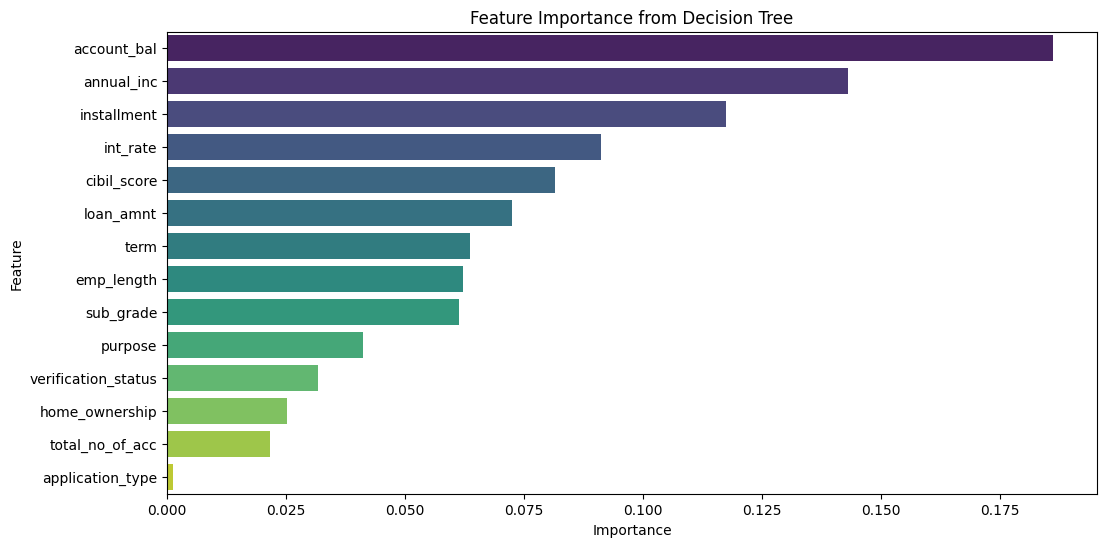

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
encoded_data = combined_data.copy()
for col in encoded_data.select_dtypes(include='object').columns:
    encoded_data[col] = LabelEncoder().fit_transform(encoded_data[col].astype(str))

# Define features and target
columns_to_drop = ['loan_status', 'dataset_type', 'customer_id', 'transaction_date']
if 'year_month' in encoded_data.columns:
    columns_to_drop.append('year_month')

features = encoded_data.drop(columns=columns_to_drop)
target = encoded_data['loan_status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a simple Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance from Decision Tree:")
print(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance from Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

The output highlights the most influential features for predicting loan defaults, such as account_bal and annual_in, which significantly impact the model's decision-making. This insight helps prioritize key features for model training and refine feature selection. It is particularly useful for building an efficient and accurate classification model for loan default prediction.